<a href="https://colab.research.google.com/github/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/Examen01_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, asi podemos despejar  de la ecuación para $x$ el tiempo:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la siguiente ecuación  ecuación trascendental.


\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

 Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













puntos 1 y 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

\

\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


In [2]:
#f = lambda R: (g/b+np.sin(x))*(R/np.cos(x))+(g/b**2) * np.log(1-(R*b)/np.cos(x))
#def fun(R, x, g,b):
  #T1 = (g/b+v0*np.sin(x))*(R/(v0*np.cos(x)))
  #T2 = g/b**2
  #T3 = np.log(1-(R*b)/(v0*np.cos(x)))
  #y=T1+T2*T3
  #return  y

R=np.linspace(0,310,10000)
g = 9.8
v0 =55
x = np.deg2rad(45)
b = 0.005
#print(x)

la raiz es:  300.69207669319275


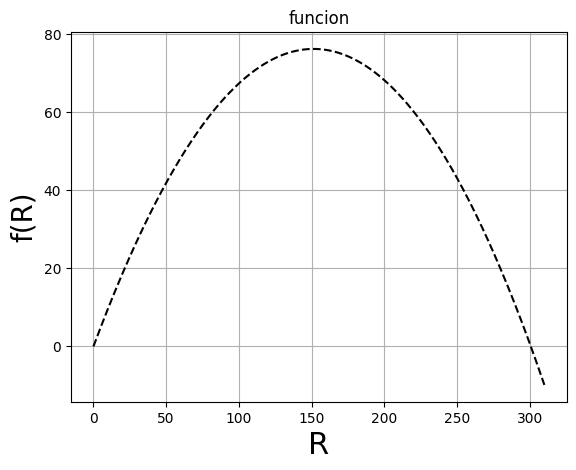

In [3]:
#def funcion(R,x, v0x, v0y,b,g):
f = lambda R: (g/b+(v0*np.sin(x)))*(R/(v0*np.cos(x)))+(g/b**2) * np.log(1-(R*b)/(v0*np.cos(x)))
  #return
df = lambda R: (g/b+(v0*np.sin(x)))*(1/v0*np.cos(x))+(g/b**2) * (1/(1-(R*b)/v0*np.cos(x)))*(-b/v0*np.cos(x))
raiz_newton = optimize.newton(f,200)
print("la raiz es: ", raiz_newton)
fig, ax = plt.subplots()
ax.plot(R, f(R)  ,"--",color="#000000")
ax.set_title('funcion')
plt.xlabel("R", fontsize=22)
plt.ylabel("f(R)", fontsize = 20)
plt.grid()

Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo  tv .

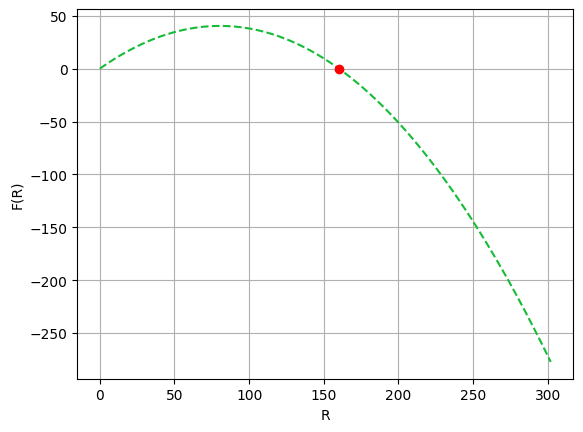

In [36]:
def func_4(R,x, g,b):
  return (g/b+(v0*np.sin(x)))*(R/(v0*np.cos(x)))+(g/b**2) * np.log(1-(R*b)/(v0*np.cos(x)))

params=(np.deg2rad(45),9.8,0.005)
x0 = 302

root = optimize.newton(func_4,x0,args = params)

plt.figure()
plt.plot(R,func_4(R,*params),"--",color = "#16BC37")
plt.plot(root,func_4(root,*params),"ro")
plt.xlabel("R")
plt.ylabel("F(R)")
plt.grid()

In [37]:
def func(R,x, g,b,v0):
  return (g/b+(v0*np.sin(x)))*(R/(v0*np.cos(x)))+(g/b**2) * np.log(1-(R*b)/(v0*np.cos(x)))

3)

In [5]:
fixed_f = lambda R: R-f(R)
raiz_fijo = optimize.fixed_point(fixed_f,x0)
print("el valor de R es: ", raiz_fijo)




el valor de R es:  300.6920766931721


In [6]:
def f1(R,v0,b,x):
  x=np.deg2rad(x)
  v0x=v0*np.cos(x)
  return -1*np.log(1-R*b/v0x)/b

tv=f1((optimize.fixed_point(fixed_f,x0)),55,0.005,45)
tv


7.885101833163718

4)
    Construya una gráfica de x vs t, y vs t, x vs y. Asegurese de no superar en las trayectorias los tiempos establecidos por el tiempo de vuelo tv.


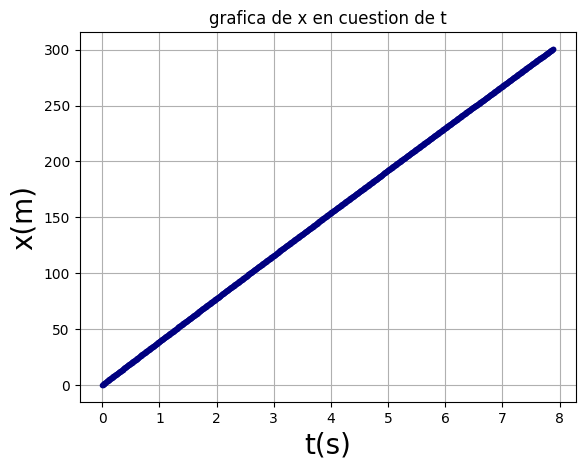

In [7]:
R=np.linspace(0,310,10000)
g = 9.8
v0 =55
b = 0.005
x = np.deg2rad(45)
v0x = v0*np.cos(x)
def func_(R,x,g,b):
  return  v0x/b*(1-np.exp(-b*t))
t=np.linspace(0,tv,1000)
#x= lambda t: v0*np.cos(x)/b*(1-np.exp(-b*t))
plt.plot(t, func_(R,x,g,b), ".",color = "#000080")
plt.xlabel("t(s)", fontsize = 20)
plt.ylabel("x(m)", fontsize = 20)
plt.title("grafica de x en cuestion de t")
plt.grid()





1b(gb+v0y)(1−e−bt)−gbt

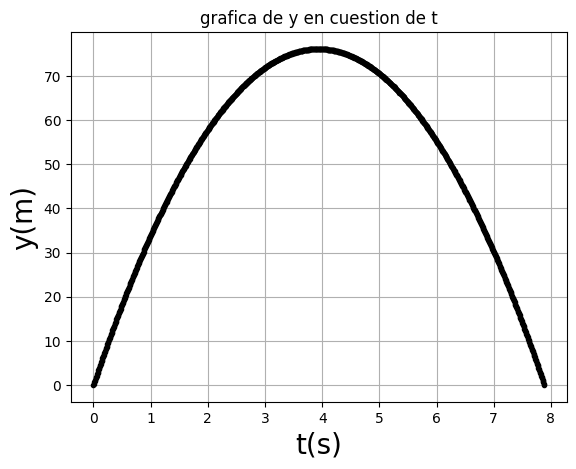

In [8]:
R=np.linspace(0,310,10000)
g = 9.8
v0 =55
x = np.deg2rad(45)
b = 0.005
v0y = v0*np.sin(x)
def func_2(R,x,g,b):
  return 1/b*(g/b+v0y)*(1-np.exp(-b*t))-(g/b)*t
plt.plot(t, func_2(R,x,g,b),".",color = "#000000")
plt.xlabel("t(s)",fontsize = 20)
plt.ylabel("y(m)",fontsize = 20)
plt.title("grafica de y en cuestion de t")
plt.grid()

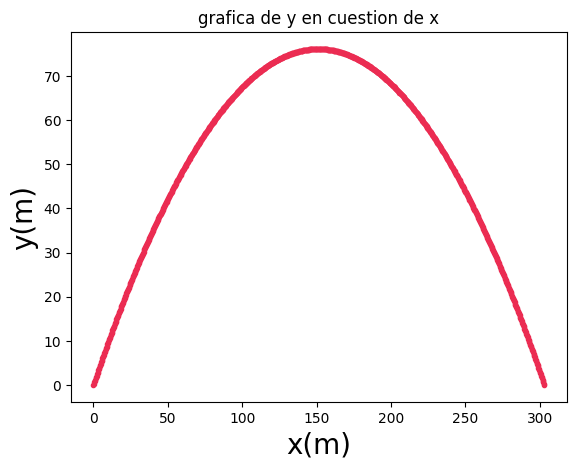

In [9]:
R=np.linspace(0,310,10000)
g = 9.8
v0 =55
x = np.deg2rad(45)
b = 0.005
v0y = v0*np.sin(x)
def func_3(R,x,g,b):
  return 1/b*(g/b+v0y)*(1-np.exp(-b*t))-(g/b)*t
x = np.linspace(0,303,1000)
plt.plot(x, func_3(R,x,g,b),".",color = "#EB2C52")
plt.xlabel("x(m)",fontsize = 20)
plt.ylabel("y(m)",fontsize = 20)
plt.title("grafica de y en cuestion de x")
plt.show()

# Suponiendo, b=0.009, v0=40m/s y θ entre 0<θ<90∘ en pasos de 5∘:
5)\generalice el resultado del punto número 2 para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo

\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

In [39]:
b=0.009
v0=40
g = 9.8
r=[]
tv=[]
def func(R,x, g,b,v0):
  x=np.deg2rad(x)
  return (g/b+(v0*np.sin(x)))*(R/(v0*np.cos(x)))+(g/b**2) * np.log(1-(R*b)/(v0*np.cos(x)))
x=np.arange(0.1, 90, 5)
for i in x:
  metodo_secante = optimize.newton(func,304,args= (i,g,b,v0))
  tiempovuelo=f1(metodo_secante,v0,b,i)
  r.append(metodo_secante)
  tv.append(tiempovuelo)
  print(f"el valor maximo para x = {i} es: {metodo_secante}m y su tiempo de vuelo es {tiempovuelo}s")




el valor maximo para x = 0.1 es: 0.5698535607487808m y su tiempo de vuelo es 0.01424727410981526s
el valor maximo para x = 5.1 es: 28.78639005712891m y su tiempo de vuelo es 0.7248795545299915s
el valor maximo para x = 10.1 es: 55.89460101101548m y su tiempo de vuelo es 1.4285041830849574s
el valor maximo para x = 15.1 es: 81.08940703083012m y su tiempo de vuelo es 2.119826958877827s
el valor maximo para x = 20.1 es: 103.6328093012853m y su tiempo de vuelo es 2.793678426542448s
el valor maximo para x = 25.1 es: 122.87446480732112m y su tiempo de vuelo es 3.4450501598994814s
el valor maximo para x = 30.1 es: 138.26919896829332m y su tiempo de vuelo es 4.06912903974692s
el valor maximo para x = 35.1 es: 149.3910787746802m y su tiempo de vuelo es 4.661329393248685s
el valor maximo para x = 40.1 es: 155.94378483331295m y su tiempo de vuelo es 5.217322892785162s
el valor maximo para x = 45.1 es: 157.76713311053052m y su tiempo de vuelo es 5.733066138701224s
el valor maximo para x = 50.1 es:

6)Realice un gráfico de  R  vs  tv

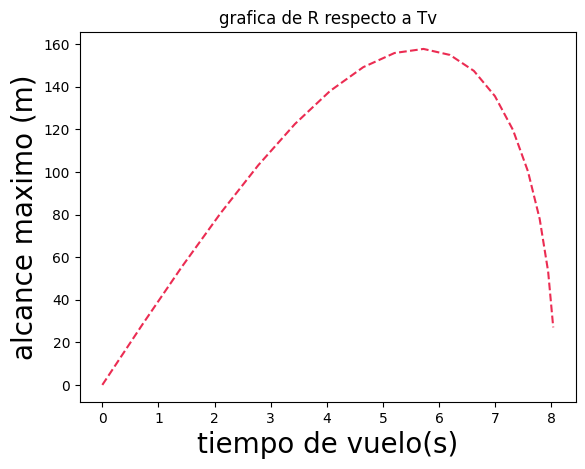

In [22]:
plt.plot(tv,r,"--",color = "#EB2C52")
plt.xlabel("tiempo de vuelo(s)",fontsize = 20)
plt.ylabel("alcance maximo (m)",fontsize = 20)
plt.title("grafica de R respecto a Tv")
plt.show()

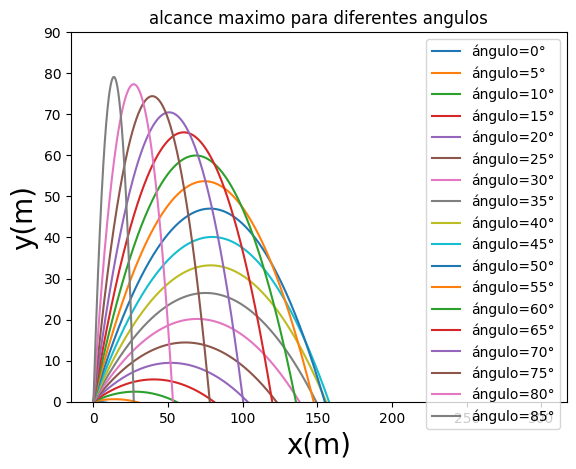

In [32]:
R= np.linspace(0,302,1000)
#def func(R,x, g,b):
for i in x:
  metodo_secante = optimize.newton(func,304,args= (i,g,b,v0))
  tiempovuelo=f1(metodo_secante,v0,b,i)
  r.append(metodo_secante)
  tv.append(tiempovuelo)
  plt.plot(R,func(R,i,9.8,0.009,40),label=f'ángulo={i}°')
  plt.ylim(0,90)
  plt.xlabel("x(m)",fontsize = 20)
  plt.ylabel("y(m)",fontsize = 20)
  plt.title("alcance maximo para diferentes angulos")
  plt.legend()
